In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.25)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
%matplotlib inline

## Splitting stabilization energy
We start by importing the ```thermo``` module from the ```prefur``` package.

In [2]:
from prefur import thermo

Using the option ```enthalpy_global``` we can introduce different amounts of local and non-local stabilization energy in the total enthalpy of the protein. This allows for the exploration of different folding regimes ("downhill", two-state and high barrier) that determine the global kinetics.

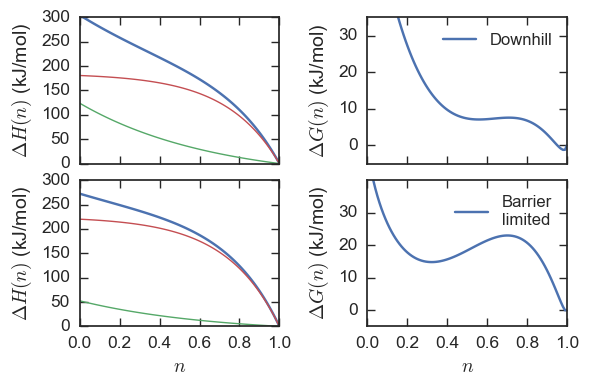

In [16]:
fig, ax = plt.subplots(2,2, figsize=(6,4), sharex=True)
ax = ax.flatten()

FES = thermo.FES(40)
FES.gen_enthalpy_global(DHloc=3.1, DHnonloc=4.52)
FES.gen_free(temp=298)
ax[0].plot(FES.nat, FES.DHo)
ax[0].plot(FES.nat, FES.DHo_loc, lw=1)
ax[0].plot(FES.nat, FES.DHo_nonloc, lw=1)
ax[1].plot(FES.nat, FES.DG, label='Downhill')
ax[1].set_ylim(-5,35)
ax[0].set_ylim(0,300)
ax[0].set_ylabel('$\Delta H(n)$ (kJ/mol)', fontsize=14)
ax[1].set_ylabel('$\Delta G(n)$ (kJ/mol)', fontsize=14)

FES = thermo.FES(40)
FES.gen_enthalpy_global(DHloc=1.31, DHnonloc=5.5)
FES.gen_free(temp=298)
ax[2].plot(FES.nat, FES.DHo)
ax[2].plot(FES.nat, FES.DHo_loc, lw=1)
ax[2].plot(FES.nat, FES.DHo_nonloc, lw=1)
ax[3].plot(FES.nat, FES.DG, label='Barrier\nlimited')
ax[3].set_ylim(-5,40)
ax[2].set_ylim(0,300)
ax[1].set_yticks(range(0,40,10))
ax[3].set_yticks(range(0,40,10))
ax[2].set_ylabel('$\Delta H(n)$ (kJ/mol)', fontsize=14)
ax[3].set_ylabel('$\Delta G(n)$ (kJ/mol)', fontsize=14)
ax[2].set_xlabel('$n$', fontsize=14)
ax[3].set_xlabel('$n$', fontsize=14)

ax[1].legend(loc=1, prop={'size': 12})
ax[3].legend(loc=1, prop={'size': 12})

plt.tight_layout(h_pad=0)
fig.savefig("regimes.png", dpi=300)

In [4]:
print np.exp(1.25), np.exp(-3)

3.49034295746 0.0497870683679


In [5]:
print -np.log(4.5), -np.log(0.0235)

-1.50407739678 3.75075485783
